## Задание 1.

Посчитайте частоты для 5-грамм в корпусе lenta.txt. двумя способами:  
1) lenta.txt -> sent_tokenize (russian) -> word_tokenize -> ngrammer  
2) lenta.txt -> word_tokenize(preserve_line=True) -> ngrammer  
    
Проанализируйте топ-20 самых частотных нграмм и проверьте есть ли различия? 

In [5]:
import re
import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from collections import Counter

In [6]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dariasavina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/dariasavina/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
path = 'lenta.txt'

with open(path, 'r', encoding='utf8') as file:
    lenta = file.read()

In [8]:
sentences = sent_tokenize(lenta, language='russian')
tokenization = [word_tokenize(sentence) for sentence in sentences]

tokenization = [[token.lower() for token in sentence if re.match(r'\w+', token)] 
                       for sentence in tokenization]

In [9]:
def ngrammer(tokens, n=2):
    ngrams = []
    for i in range(len(tokens)-n+1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams

In [11]:
five_counts = Counter()
for sentence in tokenization:
    five_counts.update(ngrammer([token for token in sentence], n=5))

In [12]:
first_five_gramms = sorted(five_counts.items(), key=lambda x: x[1], reverse=True)

In [14]:
new_tokenization = [x.lower() for x in word_tokenize(lenta, preserve_line=True) if re.match(r'\w+', x)]

In [19]:
second_five_gramms = Counter()
second_five_gramms.update(ngrammer(new_tokenization, n=5))
second_five_gramms = sorted(second_five_gramms.items(), key=lambda x: x[1], reverse=True)

In [23]:
for num, (f, s) in enumerate(zip(first_five_gramms[:20], second_five_gramms[:20])):
    if f[0] == s[0]:
        print(f'{num+1}) Общая 5-грамма: {f[0]}')
        if f[1] == s[1]:
            print(f'Количество 5-граммы: {f[1]} в обоих подходах')
        elif f[1] > s[1]:
            print(f'В первом подходе этой 5-граммы больше на {f[1]-s[1]} (всего {f[1]} и {s[1]})')
        elif f[1] < s[1]:
            print(f'Во втором подходе этой 5-граммы больше на {s[1]-f[1]} (всего {f[1]} и {s[1]})')
    else:
        print(f'{num+1}) 5-грамма не совпадает: \n{f[0]} vs {s[0]}\n{f[1]} vs {s[1]}')
    print()

1) Общая 5-грамма: риа новости со ссылкой на
Количество 5-граммы: 400 в обоих подходах

2) Общая 5-грамма: сообщает риа новости со ссылкой
Количество 5-граммы: 320 в обоих подходах

3) Общая 5-грамма: как сообщили риа новости в
Количество 5-граммы: 196 в обоих подходах

4) Общая 5-грамма: как сообщает риа новости со
Количество 5-граммы: 149 в обоих подходах

5) Общая 5-грамма: сообщает интерфакс со ссылкой на
Количество 5-граммы: 142 в обоих подходах

6) Общая 5-грамма: сообщает итар-тасс со ссылкой на
Количество 5-граммы: 118 в обоих подходах

7) Общая 5-грамма: об этом риа новости сообщили
Количество 5-граммы: 113 в обоих подходах

8) Общая 5-грамма: об этом сообщает риа новости
Количество 5-граммы: 104 в обоих подходах

9) Общая 5-грамма: этом риа новости сообщили в
Количество 5-граммы: 99 в обоих подходах

10) Общая 5-грамма: со ссылкой на источники в
Количество 5-граммы: 93 в обоих подходах

11) Общая 5-грамма: сообщили риа новости в пресс-службе
Количество 5-граммы: 88 в обоих по

первые 11 5-грамм совпадают

In [24]:
text = 'как славно сейчас было бы съесть эти чудесные пряники. жаль, что они на новый год'

In [28]:
ngrammer(word_tokenize(text, preserve_line=True), n=5)

['как славно сейчас было бы',
 'славно сейчас было бы съесть',
 'сейчас было бы съесть эти',
 'было бы съесть эти чудесные',
 'бы съесть эти чудесные пряники.',
 'съесть эти чудесные пряники. жаль',
 'эти чудесные пряники. жаль ,',
 'чудесные пряники. жаль , что',
 'пряники. жаль , что они',
 'жаль , что они на',
 ', что они на новый',
 'что они на новый год']

In [27]:
all = []
for x in [word_tokenize(x) for x in sent_tokenize(text, language='russian')]:
    all.extend(ngrammer(x, n=5))
all

['как славно сейчас было бы',
 'славно сейчас было бы съесть',
 'сейчас было бы съесть эти',
 'было бы съесть эти чудесные',
 'бы съесть эти чудесные пряники',
 'съесть эти чудесные пряники .',
 'жаль , что они на',
 ', что они на новый',
 'что они на новый год']

Засчет параметра preserve_line у нас получается токенизация происходит как будто бы одной целой строчки. То есть на стыках предложений тоже будет образовываться n-граммы (пример выше для наглядности без очистки от пунктуации)

## Задание 2.

Найдите какую-то инетересную (по вашему мнению) закономерность на https://books.google.com/ngrams/ для русского языка (с 1990 по 2022)

Вставьте сюда скриншот

Все меньше токсичности и все больше осознанности :) и они практически взаимоисключаемы!

<iframe name="ngram_chart" src="https://books.google.com/ngrams/interactive_chart?content=токсичность,осознанность&year_start=1990&year_end=2022&corpus=ru&smoothing=3" width=900 height=500 marginwidth=0 marginheight=0 hspace=0 vspace=0 frameborder=0 scrolling=no></iframe>


![Снимок экрана 2025-09-27 в 01.29.30.png](<attachment:Снимок экрана 2025-09-27 в 01.29.30.png>)
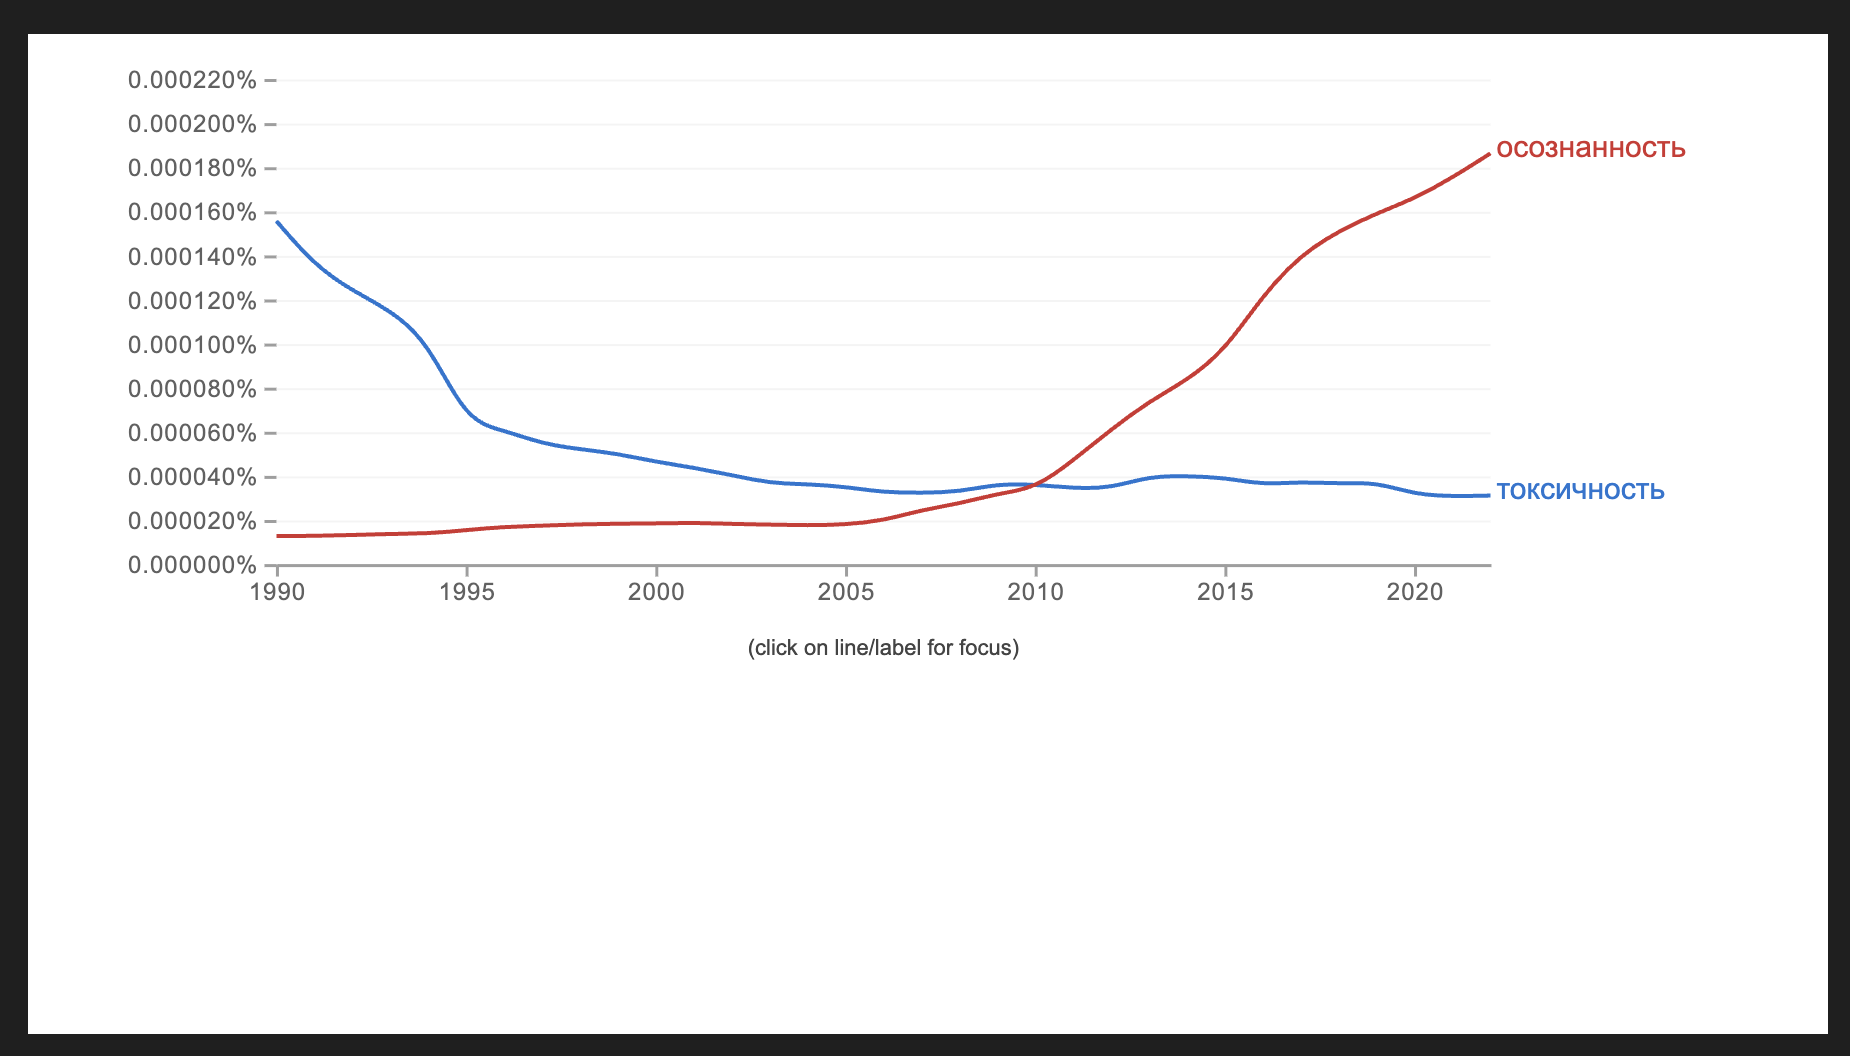

## Заданиe 3

Когда мы разбирали PMI мы использовали такую функцию:

In [2]:
def scorer_simple(word_count_a, word_count_b, bigram_count, *args):
    try:
        score = bigram_count/((word_count_a+word_count_b))
    except ZeroDivisionError:
        return 0
    return score

Но если вы посмотрите на определение в википедии, то увидите, что формула немного другая ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/094243d23c19d2d032f6bb26c4dc4f47d98d32f8)

Перепишите функцию, чтобы она точно соответствовала этому определению. Расчитайте PMI для всех биграммов также как мы делали в семинаре с помощью функции score_bigrams используя изначальный scorer и обновленный. Посмотрите есть ли разница в топ-10 биграммов. Подумайте почему результаты совпадают/отличаются?

*Подсказка: для вероятностей можно поделить на количество слов в корпусе

In [41]:
import math

In [29]:
bigramm_counts = Counter()
for sentence in tokenization:
    bigramm_counts.update(ngrammer([token for token in sentence], n=2))

In [53]:
word_counter = Counter()
for x in tokenization:
    word_counter.update(x)

In [33]:
def score_bigrams(word_count_x, word_count_y, bigram_count, corpus_length, all_bigrams_count):
    p_x = word_count_x / corpus_length
    p_y = word_count_y / corpus_length
    p_x_y = bigram_count / all_bigrams_count
    try:
        pmi_score = math.log((p_x_y / (p_x * p_y)), 2)
    except ZeroDivisionError:
        return 0
    return pmi_score

In [66]:
simple_scores = {}
new_scores = {}

all_bigramms_count = sum(bigramm_counts.values())
corpus_length = sum(word_counter.values())

for bigram in bigramm_counts.items():
    word_x, word_y = bigram[0].split()[0], bigram[0].split()[1]
    word_count_x = word_counter[word_x]
    word_count_y = word_counter[word_y]
    bigram_count = bigram[1]
    simple_scores[bigram[0]] = scorer_simple(word_count_x, word_count_y, bigram_count)
    new_scores[bigram[0]] = score_bigrams(word_count_x, word_count_y, bigram_count, corpus_length, all_bigramms_count)


In [67]:
list(sorted(simple_scores.items(), key=lambda x: -x[1]))[:10]

[('неприятель приблизившись', 0.5),
 ('саноку обстреливалась', 0.5),
 ('м.ю лермонтова', 0.5),
 ('австрийский аэроплан', 0.5),
 ('показывался аэроплан-птица', 0.5),
 ('das ist', 0.5),
 ('ist nesteroff', 0.5),
 ('могучий унесся', 0.5),
 ('зловеще гремели.и', 0.5),
 ('гремели.и пламенно', 0.5)]

In [68]:
list(new_scores.items())[:10]

[('бои у', 3.9069935108378138),
 ('у сопоцкина', 9.299310933616574),
 ('сопоцкина и', 5.579140311374476),
 ('и друскеник', 5.579140311374476),
 ('друскеник закончились', 15.941434849770062),
 ('закончились отступлением', 14.941434849770062),
 ('отступлением германцев', 19.585291039544785),
 ('неприятель приблизившись', 20.585291039544785),
 ('приблизившись с', 6.643418118999718),
 ('с севера', 4.406378921698869)]

Если я правильно понимаю, то, во-первых, у нас разная нормализация:
- в более простом случае мы просто делим на сумму вхождения двух слов из би-граммы
- в PMI метрики мы учитываем размерности корпуса слов и корпуса би-грамм

Также у нас отличается область значений:
- в обычном скорере у нас максимальное значение достигается, когда количество слов $a$ совпадает с количеством слов $b$ и они всегда составляют би-грамму. тогда при $bi_{ab} = min(a, b) = a | a = b$ мы получаем, что значением выражения после подставновки (например, $a$) равняется $a / 2a = 1/2$. Соответственно, $score \in [0; 0.5] $ 
- у PMI нет ограничений в области значений, но одновременно, кажется, он сильно чувствителен (несмотря на логарифм) к редким и частым вхождениям слов при их большом и малом со-вхождении соответственно. То есть у нас метрика очень зависит от распределению слов в корпусе; метрика как бы штрафует, если слова часто встречаются раздельно, но редко вместе.  

## Задание 4*

Обновите функцию получившуюся в предыдущем задании так, чтобы вместо произведения/деления вероятностей использовались сложение и вычитание логирифмов. 

In [61]:
def logaripmic_score_bigrams(word_count_x, word_count_y, bigram_count, corpus_length, all_bigrams_count):
    p_x = word_count_x / corpus_length
    p_y = word_count_y / corpus_length
    p_x_y = bigram_count / all_bigrams_count
    try:
        pmi_score = math.log(p_x_y, 2) - math.log(p_x, 2) - math.log(p_y, 2)
    except ZeroDivisionError:
        return 0
    return pmi_score

In [69]:
for bigram in sorted(bigramm_counts.items(), key=lambda x: x[1])[:10]:
    word_x, word_y = bigram[0].split()[0], bigram[0].split()[1]
    word_count_x = word_counter[word_x]
    word_count_y = word_counter[word_y]
    bigram_count = bigram[1]
    print(bigram[0], logaripmic_score_bigrams(word_count_x, word_count_y, bigram_count, corpus_length, all_bigramms_count))

бои у 3.906993510837818
у сопоцкина 9.299310933616576
сопоцкина и 5.579140311374478
и друскеник 5.579140311374477
друскеник закончились 15.941434849770065
закончились отступлением 14.941434849770065
отступлением германцев 19.58529103954479
неприятель приблизившись 20.58529103954479
приблизившись с 6.64341811899972
севера к 2.9674864146787616
